<a href="https://colab.research.google.com/github/anamaypandey09/covid/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
ipl = pd.read_csv('matches.csv')
ipl.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [0]:
len(ipl)

636

In [0]:
ipl['win_by_runs'].idxmax()

43

In [0]:
ipl['win_by_runs']

0      35
1       0
2       0
3       0
4      15
       ..
631     0
632     0
633    22
634     0
635     8
Name: win_by_runs, Length: 636, dtype: int64

In [0]:
ipl['win_by_runs'].max()

146

In [0]:
ipl['win_by_runs'].idxmax()

43

In [0]:
ipl.loc[43]['winner']

'Mumbai Indians'

In [0]:
ipl['win_by_wickets'].idxmax()

2

In [0]:
ipl.loc[2]['winner']

'Kolkata Knight Riders'

In [0]:
ipl[ipl['win_by_wickets'] == 10]['winner']

2            Kolkata Knight Riders
34                 Kings XI Punjab
71                 Deccan Chargers
119               Delhi Daredevils
183    Royal Challengers Bangalore
298               Rajasthan Royals
376                 Mumbai Indians
390            Chennai Super Kings
542    Royal Challengers Bangalore
590            Sunrisers Hyderabad
Name: winner, dtype: object

In [0]:
ipl['winner'].value_counts().idxmax()

'Mumbai Indians'

In [0]:
ipl['season']

0      2017
1      2017
2      2017
3      2017
4      2017
       ... 
631    2016
632    2016
633    2016
634    2016
635    2016
Name: season, Length: 636, dtype: int64

In [0]:
ipl['season'].value_counts().max()

76

In [0]:
len('season')

6

In [0]:
len(ipl['season'].unique())

10

In [5]:
covid=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
covid.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
covid.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [12]:
covid['Active'] = covid['Confirmed']-covid['Recovered']-covid['Deaths'] 
covid

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
30205,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-14,235,7,4,224
30206,NaN,Yemen,15.552727,48.516388,2020-05-14,85,12,1,72
30207,NaN,Comoros,-11.645500,43.333300,2020-05-14,11,1,3,7
30208,NaN,Tajikistan,38.861034,71.276093,2020-05-14,907,29,0,878


In [0]:
covid[covid['Date'] == covid['Date'].max()]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
29945,NaN,Afghanistan,33.000000,65.000000,2020-05-14,5639,136,691,4812
29946,NaN,Albania,41.153300,20.168300,2020-05-14,898,31,694,173
29947,NaN,Algeria,28.033900,1.659600,2020-05-14,6442,529,3158,2755
29948,NaN,Andorra,42.506300,1.521800,2020-05-14,761,49,596,116
29949,NaN,Angola,-11.202700,17.873900,2020-05-14,48,2,14,32
...,...,...,...,...,...,...,...,...,...
30205,NaN,Sao Tome and Principe,0.186360,6.613081,2020-05-14,235,7,4,224
30206,NaN,Yemen,15.552727,48.516388,2020-05-14,85,12,1,72
30207,NaN,Comoros,-11.645500,43.333300,2020-05-14,11,1,3,7
30208,NaN,Tajikistan,38.861034,71.276093,2020-05-14,907,29,0,878


In [0]:
covid['Country/Region'].value_counts()[:100]

China             3762
Canada            1596
France            1254
United Kingdom    1254
Australia          912
                  ... 
Zimbabwe           114
Oman               114
Venezuela          114
Barbados           114
Fiji               114
Name: Country/Region, Length: 100, dtype: int64

In [0]:
top = covid.groupby('Country/Region')['Confirmed','Deaths','Recovered','Active'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [0]:
active = covid.groupby('Date')['Active'].sum().reset_index()
active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
109,2020-05-10,2442197
110,2020-05-11,2468048
111,2020-05-12,2510524
112,2020-05-13,2536535


In [10]:
deaths = covid.groupby('Date')['Deaths'].sum().reset_index()
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
109,2020-05-10,282709
110,2020-05-11,286330
111,2020-05-12,291942
112,2020-05-13,297197


In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.scatter(confirmed['Date'],confirmed['Confirmed'])
plt.show()

NameError: ignored

<Figure size 864x864 with 0 Axes>

In [17]:
confirmed = covid.groupby('Date')['Confirmed'].sum().reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
109,2020-05-10,4101693
110,2020-05-11,4177496
111,2020-05-12,4261741
112,2020-05-13,4347012


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

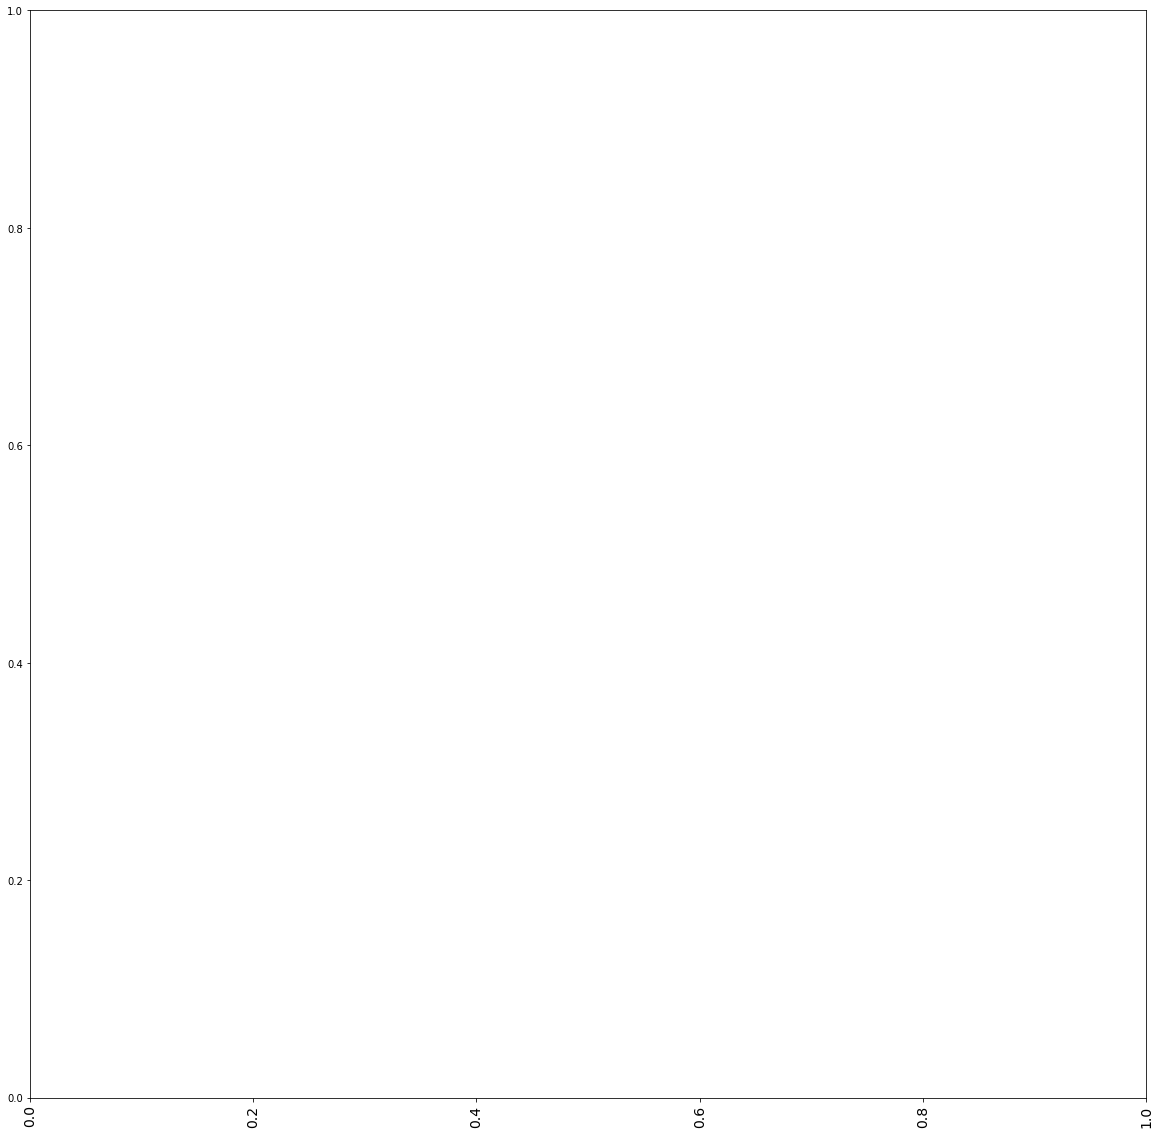

In [9]:
import seaborn as sns
plt.figure(figsize=(20,20))
plt.xticks(rotation=90,fontsize='14',color='black')
sns.pointplot(confirmed['Date'].dt.date,confirmed['Confirmed'],color='red')
sns.pointplot(active['Date'].dt.date,active['Active'],color='green')
sns.pointplot(deaths['Date'].dt.date,deaths['Deaths'],color='blue')
plt.show

In [14]:
top_20=top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).reset_index().head(20)

NameError: ignored

In [13]:
plt.figure(figsize=(16,11))
sns.barplot(top_20['Confirmed'],top_20['Country/Region'])
plt.show

NameError: ignored

<Figure size 1152x792 with 0 Axes>

In [0]:
top_5=top.groupby('Country/Region')['Confirmed','Date'].sum().sort_values(ascending=False).reset_index().head(5)
top_5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [0]:
country = covid.groupby('Date')['Country/Region'].sum.reset_index()
country

AttributeError: ignored

In [0]:
activE = top_5.groupby('Date')['Active'].sum().reset_index()
activE

KeyError: ignored

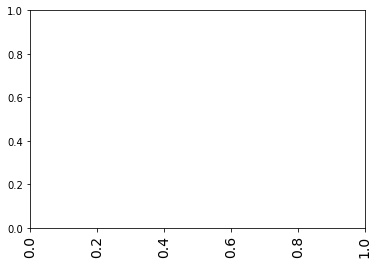

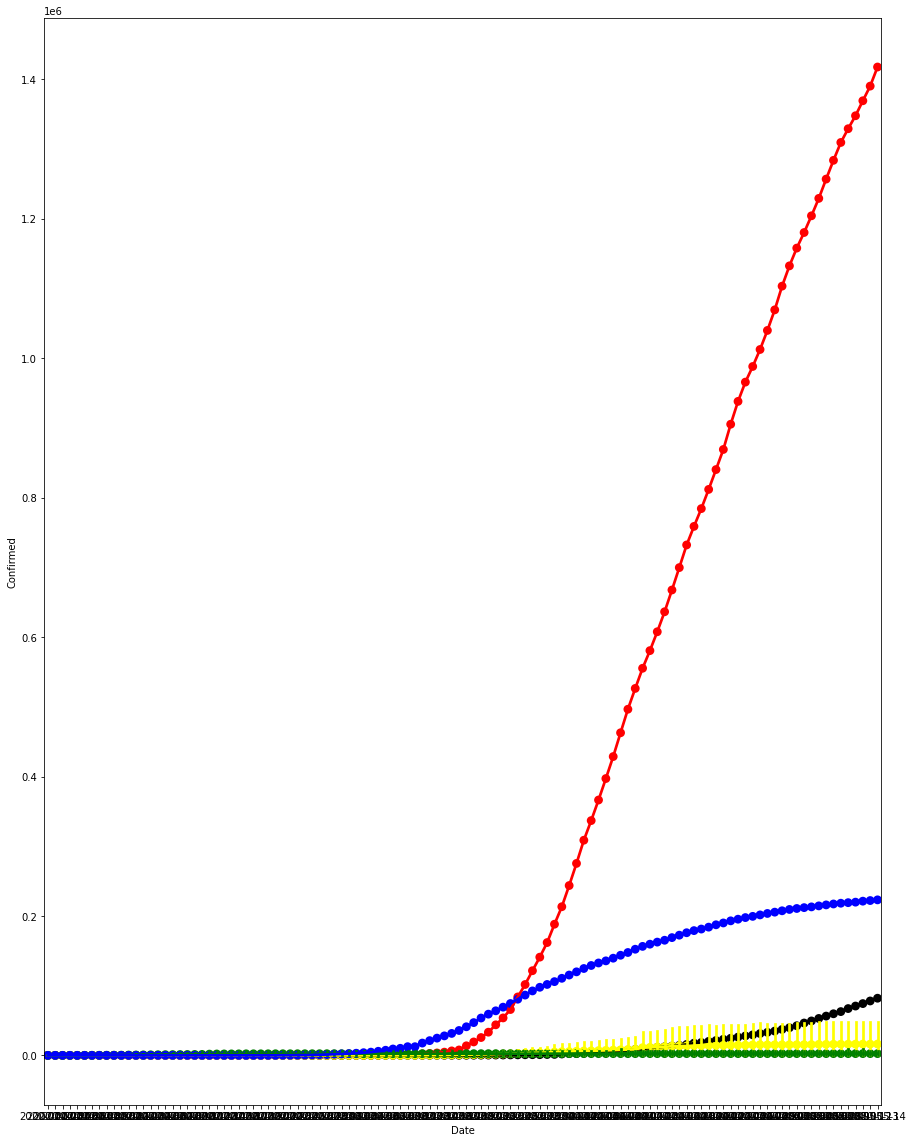

In [21]:
us = covid[covid['Country/Region']=='US']
ind = covid[covid['Country/Region']=='India']
fra = covid[covid['Country/Region']=='France']
china = covid[covid['Country/Region']=='China']
italy = covid[covid['Country/Region']=='Italy']
plt.xticks(rotation=90,fontsize='14',color='black')
plt.figure(figsize=(15,20))
sns.pointplot(us['Date'].dt.date, us['Confirmed'], color='red')
sns.pointplot(ind['Date'].dt.date, ind['Confirmed'], color='black')
sns.pointplot(fra['Date'].dt.date, fra['Confirmed'], color='yellow')
sns.pointplot(china['Date'].dt.date, china['Confirmed'], color='green')
sns.pointplot(italy['Date'].dt.date, italy['Confirmed'], color='blue')
plt.show()